In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

### Mergin 12 months sales data in signle file

In [42]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data , df])

    
all_months_data.to_csv("all_data.csv" , index = False)

### Read an updated DataFrame

In [43]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data !

#### Drop Rows Containing NaN values

In [47]:
# Finding out the NaN values row and column wherever we have NaN values present we will find it out.

nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# W ehave to drop all the NaN values

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### ValueError: invalid literal for int() with base 10: 'Or'

In [54]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

# you can see that there are lots of data whihc is messed up we need to remove all these datas



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [55]:
# We need all the values which is not equals to "Or"
# Only those values are usefule for us.

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Convert columns to the correct data types

In [60]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# make Int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make Float 

all_data.head()

/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/4236370688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# make Int
/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/4236370688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make Float


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Augumnet the data with some additional columns


####  Task2. :Add month Column

In [56]:
# In our data we find that we don't have month but we have date in our dataset
# What e will do is that we will take the 1st 2 strings from our Order_Date column and we will add it to our month column

all_data['Month'] = all_data['Order Date'].str[0:2]



# By using astype method we will convert all the month string data to numeric data
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/3629930492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]
/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/3629930492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Task 3: Add a Sales colums

In [71]:
all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']

all_data.head()

/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/740234043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Task 4 : Add a city columns



In [89]:
# In our Purchase address we have the city column
# Let's use the .apply() method

def get_city(address):
    return address.split(',')[1]

# function for extracting State from it
def get_state(address):
    return address.split(',')[2].split(' ')[1]

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ('+ get_state(x) + ')') 

# Instead of doing this we can also use F-string method for printing it this the the more tecnical way to do that


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({ get_state(x) })") 

#all_data = all_data.drop(columns = 'Column' , inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Question 1: What was the best month for sale? How much was earned in that particular month


In [72]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


#### Plotting of the sales data

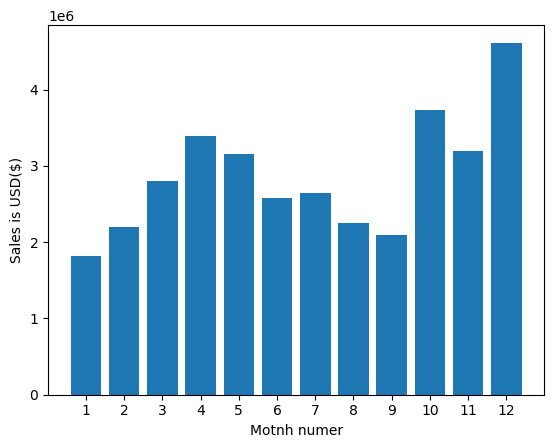

In [74]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales is USD($)')
plt.xlabel('Motnh numer')
plt.show()

### Q2 :Which US city had the heights number of sales ?

In [92]:
results_2 = all_data.groupby('City').sum()
results_2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


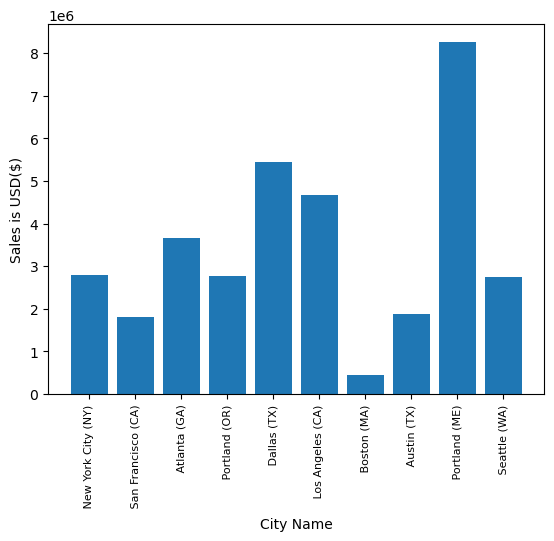

In [98]:
# Now we need to extract unique cities we can use the dataset

cities = all_data['City'].unique()

plt.bar(cities, results_2['Sales'])

plt.xticks(cities , rotation = 'vertical' , size = 8)

plt.ylabel('Sales is USD($)')
plt.xlabel('City Name')
plt.show()

### Here we are seeing the difrence between the 2 graphs because of the order of the city
issue is that while showing the "y" data order matters but when we use the unique on our column our "x" data and "y"
data are not in same order "city" with same order with "sales" column So,
1st (above) graph is for correcting the order and the 2nd graph is corrected plot

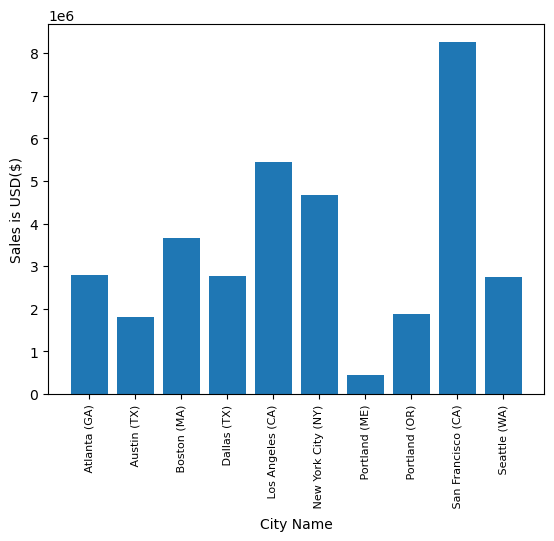

In [99]:
# Now we need to extract unique cities we can use the dataset

cities = [city for city, df in all_data.groupby('City')] # list comprehenssion

plt.bar(cities, results_2['Sales'])

plt.xticks(cities , rotation = 'vertical' , size = 8)

plt.ylabel('Sales is USD($)')
plt.xlabel('City Name')
plt.show()

### Question 3 : what time should we dsplay advertisment to maximize likelihood of customer's buying product?

for analysizg that we have check out on our orderdate column where we have time too 

In [100]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [ ]:
# How to proceed 1st we have to "parse" this order date like a string and grab the month column

# we convert the order date into Date time object. basically the date time library


In [103]:

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [112]:
# Adding hour column to out data

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


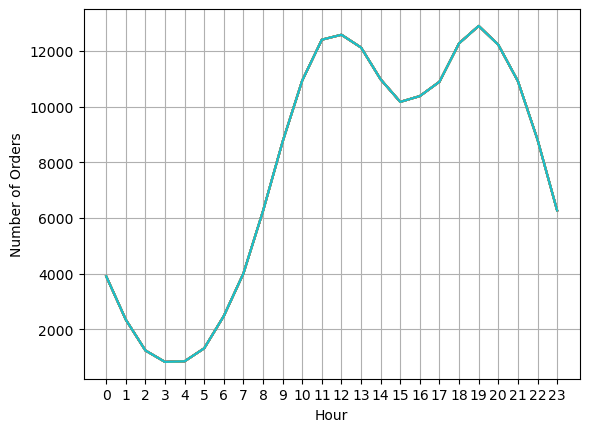

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [116]:
# figuring out the best time for showing the advertisement

hours = [hour for hour, df in all_data.groupby('Hour')]


plt.plot(hours , all_data.groupby(['Hour']).count())
all_data.groupby(['Hour']).count()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
           
plt.grid()
plt.show()
all_data.groupby(['Hour']).count()

#### The above graph we can say that at which time we can show the adverstisment so that sales can be increased.

### Question 4 : Which products are most often sold together?

In [118]:
# we have to find out the order ID which product is sold together most of the time. So we have to count out the duplicate order Id's
# we will filter the all data with order Id
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df.head(10)






,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


In [119]:
df['Grouped']  =df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/1331669343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']  =df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [120]:
# drop out those duplicated occurences

df = df[['Order ID' , 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [122]:
df.shape

(7136, 2)

In [133]:
# count the pairs of items bought together
from itertools import combinations
from collections import Counter


count = Counter()

# we will use grouped items as our sublist

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # this will give most common 3 in a row if you chaneg the values it will that combinations
    
    
for key, value in count.most_common(10):
    print(key,value)
    
# for getting most 10 occurance values we can use the below code    
#count.most_common(10)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: Which product sold most why do you think it got sold most

In [134]:
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [137]:
quantity_ordered = product_group.sum()['Quantity Ordered']

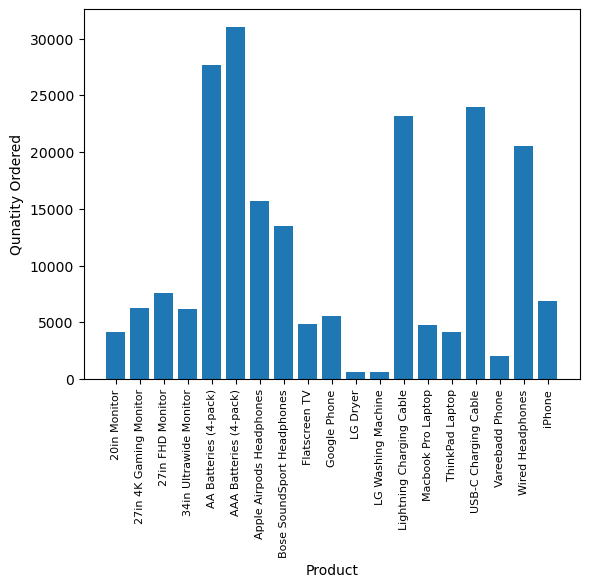

In [147]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group ]

plt.bar(products , quantity_ordered)
plt.ylabel('Qunatity Ordered')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Product')
plt.show()

In [149]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


#### Stackover flow ref : - How to overlap the price data with the product data for more clarification about the details of the product.

### Adding a y-axis label to secondary y-axis in matplotlib

/var/folders/lb/zvqk_ky925nfwj3jh_l2y2_r0000gn/T/ipykernel_83349/39294009.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


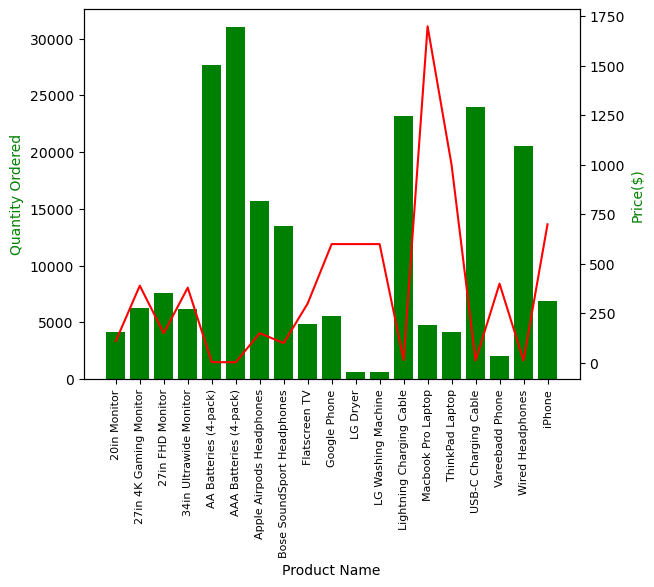

In [160]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products , quantity_ordered, color = 'g')
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='g')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()